# Classificação e regressão usando árvores de decisão

### Árvore de decisão binária

Árvore de decisão binária é uma árvore binária onde cada nó, que não é folha, tem associada uma "pergunta", ou um valor, sobre um determinado atributo/medida do objeto que queremos classificar. Por exemplo, na árvore binária do exemplo anterior, a primeira pergunta estaria associada ao sangue (o sangue é frio?).

Em outras palavras, usar uma árvore de decisão para classificar um objeto é muito simples, basta percorrermos a árvore da raiz para as folhas, respondendo às perguntas associadas a cada nó interno (ou nó que não é folha) da árvore.

Por outro lado, induzir (que é a palavra que usasse para a tarefa de construir uma árvore binária é o problema real que os algoritmos de aprendizado de máquina precisam resolver. 

Para ilustrar um algoritmo de indução de árvores de decisão, vamos primeiramente apresentar o conjunto de dados que vamos usar.

Comecemos apresentando um conjunto de dados (dataset) muito conhecido da comunidade, o IRIS.

In [1]:
import os
import pydotplus

from sklearn.datasets import load_iris
from IPython.display import Image  
%matplotlib inline 

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [15, 15]

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

#define função para criar plots com fronteiras de decisão
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.tab20)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab20b, s=5)
    plt.axis('off')


IRIS é um dataset com 150 medidas de comprimento e largura de pétalas (petal) e sépalas (sepal). A sépala é um tipo de folha que protege a pétala. A figura abaixo mostra um exemplo de uma flor do tipo iris virgínica (fonte: Wikipedia).

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/240px-Iris_virginica_2.jpg")

A figura abaixo mostra um exemplo de uma flor do tipo iris setosa (fonte: Wikipedia).

In [3]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg")

A figura abaixo mostra um exemplo de uma flor do tipo iris versicolor (fonte: Wikipedia).

In [4]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Blue_Flag%2C_Ottawa.jpg/240px-Blue_Flag%2C_Ottawa.jpg")

A figura abaixo mostra a diferença entre a sépala e a pétala em uma flor (fonte: Wikipedia). Note que, na flor iris, a sépala é, em geral, maior que a pétala e parece-se muito com uma pétala.

In [5]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Petal-sepal.jpg/226px-Petal-sepal.jpg")

In [6]:
# O conjunto iris pode facilmente ser carregado usando o seguinte comando.

iris = load_iris()

In [7]:
# Estes são as primeiras dez linhas da matriz de dados de quatro colunas do iris.

print(iris.data[1:10])

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [8]:
# Estes são as primeiras dez linhas da matriz de rótulos do iris.

print(iris.target[1:10])

[0 0 0 0 0 0 0 0 0]


In [9]:
# Estes são os nomes dos rótulos (que são os nomes dos tipos das flores).

print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [10]:
# Estes são os nomes dos atributos (e as respectivas unidades de medida) de cada uma das colunas do iris.

print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Para facilitar a explicação, de um algoritmo de indução de  árvores de decisão, vamos começar com o problema de separar apenas duas classes de iris, setosa e versicolor. Para isso, vamos tomar apenas os valores do conjunto de dados cujos targets são 0 e 1.

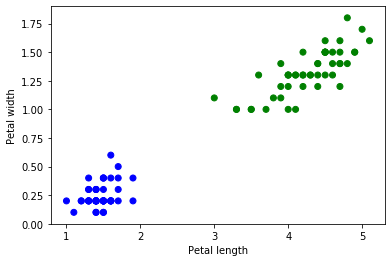

In [11]:
# Criamos um conjunto X com apenas as linhas correspondentes às classes setosa 
# e versicolor e um conjunto Y com os respectivos rótulos.

X = iris.data[(iris.target==0)|(iris.target==1),:]
y = iris.target[(iris.target==0)|(iris.target==1)]

# Vamos fazer um gráfico do comprimento vs largura das pétalas
import matplotlib as mpl
import matplotlib.pyplot as plt

colors = ['blue','green']
plt.scatter(X[:,2],X[:,3],c=y,cmap=mpl.colors.ListedColormap(colors))

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

É fácil ver que basta olhar para o comprimento da pétala para separar as duas classes com apenas uma pergunta que poderia ser (escolheremos um valor arbitrário para o comprimento da pétala):
    If X[i,2] > 2.5: 
        classe = 0
    else:
        classe = 1

Uma outra forma seria examinar a largura da pétala e escolher o valor, digamos 0.75:

Em ambos os casos temos uma forma heurística de induzir uma árvore de decisão e que resultam em uma árvore com apenas um nó raiz e nesse nó temos uma pergunta sobre apenas uma característica que é o comprimento, ou a largura, da pétala. Todos os dados do conjunto seriam separados perfeitamente em dois nós folha. 

A forma heurística não é interessante e precisamos de uma outra estratégia que induza a árvore sem necessidade de auxílio humano, ou gráfico. 

#### Algoritmo para indução de uma árvore de decisão binária

Existem muitas formas de induzir uma árvore de decisão e a forma mais intuitiva é um algoritmo recursivo que, a cada nó, que não um nó folha, particiona (em duas partes/subconjuntos) o conjunto de treinamento de acordo com algum critério que minimiza a impureza de cada subconjunto. 

Um algoritmo recursivo é formado por duas partes importantes: a base e o passo da recursão. A base da recursão é fundamental, senão o algoritmo não pára. O passo da recursão faz as vezes do laço ("loop") num algoritmo não recursivo.

Para facilitar o entendimento, vamos chamar de $X$ o conjunto de objetos $x \in \mathcal{R}^d$ que desejamos classificar. A cada $x \in \mathcal{X}$, está associado um rótulo $y \in Y$, $Y \in \mathcal{Z}$. 

Vamos denominar por $x_i \in R$ a cada uma das características (medidas) de $x$ na dimensão $i$. Dessa forma, $x = \{x_1,x_2,\ldots,x_d\}$. 

Desta forma, dado um conjunto de objetos $X \in R^4$, como no caso do exemplo do iris reduzido a duas classes acima, podemos particionar $X$ em dois subconjuntos:

$X_R = \{x \in X | x_2 <= 2.5\}$ e $X_L = \{x \in X | x_2 > 2.5\}$ 

Neste notebook trataremos apenas das árvores binárias transversais, isto é, cada nó está associado a uma pergunta sobre apenas uma característica. 

#### Medida de impureza

Um outro elemento fundamental no algoritmos de indução é a medida de impureza que será usada para decidir que valor será usado como limiar para o particionamento do conjunto. Essa medida tem que refletir, de alguma forma, a  mistura de rótulos num determinado subconjunto. O objetivo, então, é achar uma característica $x_i$ e um valor para ser aplicado a $x_i$ que particione o conjunto em dois subconjuntos $X_R$ e $X_L$, de forma a tornar os subconjuntos mais puros e ter um ganho na medida de impureza. Matematicamente, se denotarmos por $I$ essa medida, queremos otimizá-la de tal forma que:

$\Delta I(X) = I(X) - P_L I(X_L) - P_R I(X_R) = I(X) - P_L I(X_L) - (1-P_L) I(X_R)$

Onde $P_L$ ($P_R$) é a proporção de elementos de $X$ que estão no conjunto $X_L$ ($X_R$). Note que $P_R = 1 - P_L$. 

Quanto maior o $\Delta I(X)$, melhor o particionamento. Pense sobre isso!


#### Algoritmo DT em alto nível de abstração

entrada: X, # conjunto de dados 
         Y, # conjunto de rótulos
         I, # medida de impureza
         
saída: Árvore de decisão

DT(X,Y,I):

    cria novo node # nó
    if X é puro: 
        retorna o node (nó folha) que representa X
    else:   
        encontre a partição X = X_L \cup X_R que dê o maior ganho de pureza
        node.left = DT(X_L)    
        node.right = DT(X_R)
    retorna node

#### A entropia como medida de impureza

Antes de demonstrar o algoritmo, vamos apresentar uma medida de impureza e fazer a conta que o algoritmo faria na mão.

Entropia é uma medida cuja história é, por si, muito interessante. No contexto de Teoria da Informação, ela foi inicialmente proposta por Claude Shanon no artigo "A Mathematical Theory of Communication":

https://ieeexplore.ieee.org/document/6773024

Em teoria da informação, há duas atoras importantes: a fonte e a receptora da mensagem. A ideia de Shannon era criar uma medida de informação que refletisse o quão surpreendente era uma mensagem para a receptora. Quanto mais surpreendente, ou menos provável, for a mensagem, mais informação ela carrega. Por outro lado, quanto mais provável for a mensagem, menos surpreendende ela será e menos informação ela carrega. Matematicamente, se denotarmos por $H$ a medida de informação e por $p$ a medida de probabilidade (note que estamos tratando de eventos discretos), matematicamente teríamos:

$H(m) \propto \frac{1}{p(m)}$

Uma outra propriedade que Shannon queria dessa medida é que, se a fonte mandasse duas mensagens diferentes, digamos $m_1$ e $m_2$, a medida da informação das duas mensagens conjuntas, isto é, $m_1 . m_2$ fosse a soma das medidas de informação $m_1$ e $m_2$. Matematicamente:

$H(m_1.m_2) \propto H(m_1)+H(m_2)$

Como é sabido, o logaritmo é o funcional que leva uma função produto a uma função soma, assim, a medida de entropia de um conjunto $M = \{m_1,m_2,\ldots,m_n\}$ de mensagens, usualmente denotada por $H$, é definida como uma média (por isso o produto pela probabilidade) da medida de informação de cada mensagem do conjunto $M$:

$H(M) = \sum\limits_{i=1}^{n} -p(m_i)\log p(m_i)$

Uma propriedade importante da entropia é que ela é um valor entre 0 e 1.

#### Exemplo usando os dados

Vamos fazer a conta da entropia para três valores de largura de pétala e três de comprimento de pétala.

Para a largura da pétala, vamos escolher arbitrariamente os valores $0.4, 0.8$ e $1.2$. 

In [12]:
from math import log2

# Entropia do conjunto X[:,3]
H = -50/100 * log2(50/100) - 50/100 * log2(50/100)
print("Entropia do conjunto X[:,3] =", H)

# Vamos particionar X[:,3] em 0.4 :
index04 = (X[:,3]<=0.4)
nSetosa04 = sum(y[index04]==0)
n04R = sum(index04)
nVersicolor04 = sum(y[~index04])
n04L = sum(~index04)

print("Número de flores iris setosa com largura de pétala menor, ou igual a 0.4 =", nSetosa04)
print("Número de flores com largura de pétala menor, ou igual a 0.4 =", n04R)
print("Número de flores iris versicolor com largura de pétala maior que 0.4=", nVersicolor04)
print("Número de flores com largura de pétala maior que 0.4 =", n04L)

# A entropia do lado direito (valores menores, ou iguais a 0.4)
H04R = -nSetosa04/n04R * log2(nSetosa04/n04R) 

# A entropia do lado esquerdo (valores maiores que 0.4)
H04L = -(n04L-nVersicolor04)/n04L * log2((n04L-nVersicolor04)/n04L) - nVersicolor04/n04L * log2(nVersicolor04/n04L)

# O delta de entropia
deltaH04 = H - n04L/(n04L+n04R) * H04L - n04R/(n04L+n04R) * H04R

Entropia do conjunto X[:,3] = 1.0
Número de flores iris setosa com largura de pétala menor, ou igual a 0.4 = 48
Número de flores com largura de pétala menor, ou igual a 0.4 = 48
Número de flores iris versicolor com largura de pétala maior que 0.4= 50
Número de flores com largura de pétala maior que 0.4 = 52


In [13]:
# Vamos particionar X[:,3] em 0.8 :
index08 = (X[:,3]<=0.8)
nSetosa08 = sum(y[index08]==0)
n08R = sum(index08)
nVersicolor08 = sum(y[~index08])
n08L = sum(~index08)

print("Número de flores iris setosa com largura de pétala menor, ou igual a 0.8 =", nSetosa08)
print("Número de flores com largura de pétala menor, ou igual a 0.8 =", n08R)
print("Número de flores iris versicolor com largura de pétala maior que 0.8=", nVersicolor08)
print("Número de flores com largura de pétala maior que 0.8 =", n08L)

# A entropia do lado direito (valores menores, ou iguais a 0.8)
H08R = -nSetosa08/n08R * log2(nSetosa08/n08R) 

# A entropia do lado esquerdo (valores maiores que 0.8)
H08L = -nVersicolor08/n08L * log2(nVersicolor08/n08L)

# O delta de entropia
deltaH08 = H - n08L/(n08L+n08R) * H08L - n08R/(n08L+n08R) * H08R


Número de flores iris setosa com largura de pétala menor, ou igual a 0.8 = 50
Número de flores com largura de pétala menor, ou igual a 0.8 = 50
Número de flores iris versicolor com largura de pétala maior que 0.8= 50
Número de flores com largura de pétala maior que 0.8 = 50


In [14]:
# Vamos particionar X[:,3] em 1.2 :
index12 = (X[:,3]<=1.2)
nSetosa12 = sum(y[index12]==0)
n12R = sum(index12)
nVersicolor12 = sum(y[~index12])
n12L = sum(~index12)

print("Número de flores iris setosa com largura de pétala menor, ou igual a 1.2 =", nSetosa12)
print("Número de flores com largura de pétala menor, ou igual a 1.2 =", n12R)
print("Número de flores iris versicolor com largura de pétala maior que 1.2=", nVersicolor12)
print("Número de flores com largura de pétala maior que 1.2 =", n12L)

# A entropia do lado direito (valores menores, ou iguais a 1.2)
H12R = -nSetosa12/n12R * log2(nSetosa12/n12R) - (n12R - nSetosa12)/n12R * log2((n12R - nSetosa12)/n12R)

# A entropia do lado esquerdo (valores maiores que 1.2)
H12L = - nVersicolor12/n12L * log2(nVersicolor12/n12L)

# O delta de entropia
deltaH12 = H - n12L/(n12L+n12R) * H12L - n12R/(n12L+n12R) * H12R

Número de flores iris setosa com largura de pétala menor, ou igual a 1.2 = 50
Número de flores com largura de pétala menor, ou igual a 1.2 = 65
Número de flores iris versicolor com largura de pétala maior que 1.2= 35
Número de flores com largura de pétala maior que 1.2 = 35


In [126]:
print("H04R =" , H04R)
print("H04L =" , H04L)

print("H08R =" , H08R)
print("H08L =" , H08L)

print("H12R =" , H12R)
print("H12L =" , H12L)

print("----------------------------------")

print("DeltaH04 =", deltaH04)
print("DeltaH08 =", deltaH08)
print("DeltaH12 =", deltaH12)


H04R = -0.0
H04L = 0.23519338181924143
H08R = -0.0
H08L = -0.0
H12R = 0.7793498372920852
H12L = -0.0
----------------------------------
DeltaH04 = 0.8776994414539945
DeltaH08 = 1.0
DeltaH12 = 0.49342260576014463


Desta maneira, comparando os três deltas, o melhor particionamento dentre esses três seria o 0.8.

### Vamos agora usar o pacote sklearn e a classe tree para fazer o mesmo problema.

Acurácia = 100.0  porcento, como esperado.


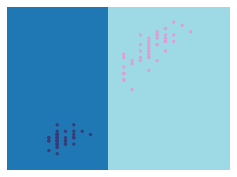

In [15]:
# Importa a classe tree
from sklearn import tree
from sklearn.metrics import accuracy_score

X = X[:,[3,2]]

# Cria um objeto decision tree com a medida de impuridade entropy
clf = tree.DecisionTreeClassifier("entropy")

# Ajusta o classificador sobre o conjunto de dados rotulados
clf.fit(X, y)

# Calcula o erro do classificador nos dados de treinamento
y_pred = clf.predict(X)

print("Acurácia =",accuracy_score(y,y_pred)*100," porcento, como esperado.")

plot_decision_boundary(clf, X, y)

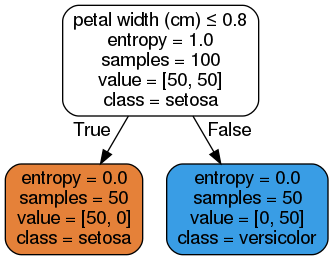

In [16]:
# Apresenta a árvore 
# Código copiado de um exemplo da biblioteca
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['petal width (cm)', 'petal length (cm)'],
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

Acurácia = 100.0  porcento.


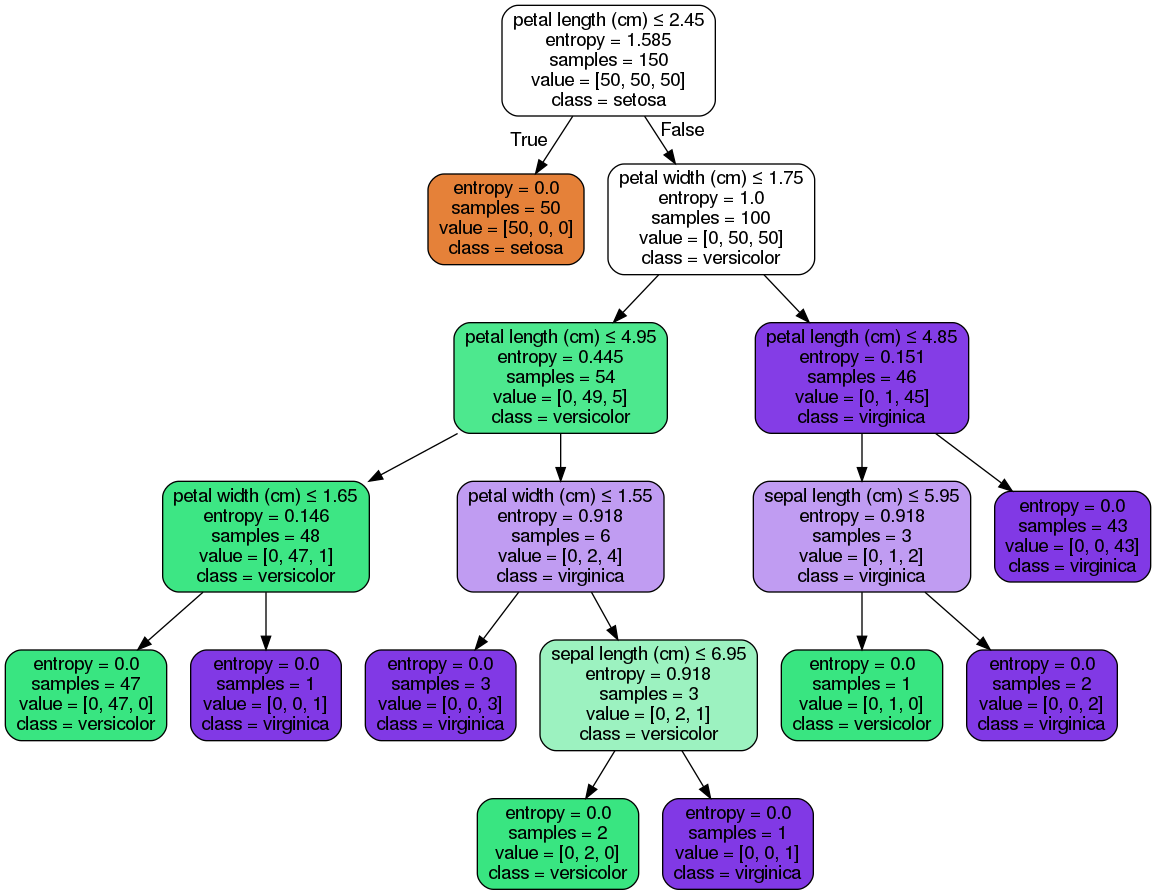

In [21]:
# Vamos fazer o mesmo para o conjunto todo do Iris. Note como a árvore fica mais profunda 
# por conta da mistura de classes.

X = iris.data
y = iris.target

# Cria um objeto decision tree com a medida de impuridade entropy
clfAll = tree.DecisionTreeClassifier("entropy")

# Ajusta o classificador sobre o conjunto de dados rotulados
clfAll.fit(X, y)

# Calcula o erro do classificador nos dados de treinamento
y_pred = clfAll.predict(X)

print("Acurácia =",accuracy_score(y, y_pred)*100," porcento.")

# Apresenta a árvore 
# Código copiado de um exemplo da biblioteca

dot_data = tree.export_graphviz(clfAll, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

Acurácia = 97.33333333333334  porcento.


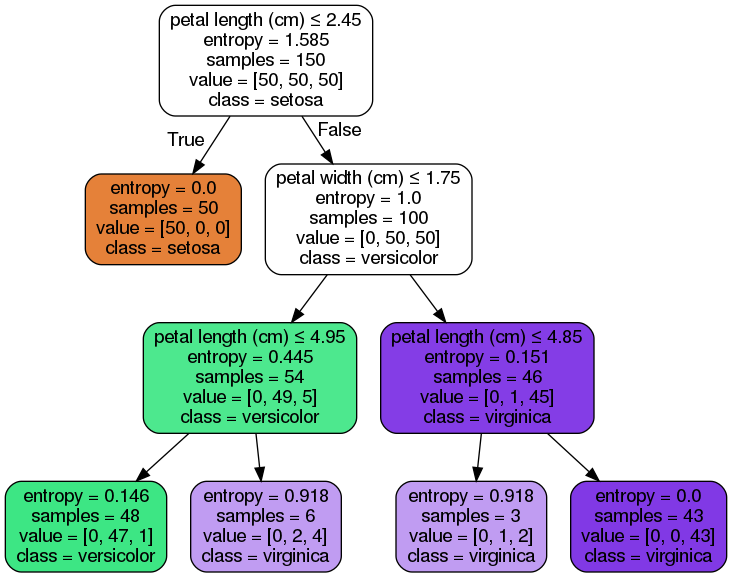

In [22]:
# Vamos refazer o mesmo exemplo anterior, mas agora vamos limitar 
# a profundidade da árvore e calcular o erro nos dados de treinamento.
# Esta é uma forma usual para regularizar o problema da indução da árvore.

X = iris.data
y = iris.target

# Cria um objeto decision tree com a medida de impuridade entropy
clfAll = tree.DecisionTreeClassifier("entropy",max_depth=3)

# Ajusta o classificador sobre o conjunto de dados rotulados
clfAll.fit(X, y)

# Calcula o erro do classificador nos dados de treinamento
y_pred = clfAll.predict(X)

print("Acurácia =",accuracy_score(y, y_pred)*100," porcento.")

# Apresenta a árvore 
# Código copiado de um exemplo da biblioteca

dot_data = tree.export_graphviz(clfAll, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  